In [15]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
plt.style.use('ggplot')

### Make dataframe for classification problem using sklearn.make_classification

In [104]:
x,y=make_classification(n_samples=1000,n_features=2,n_informative=1,n_clusters_per_class=1,n_redundant=0,hypercube=False,n_classes=2,random_state=20,class_sep=3)

[[ 2.87876946e+00 -1.27619505e-03]] [-1.96882206]


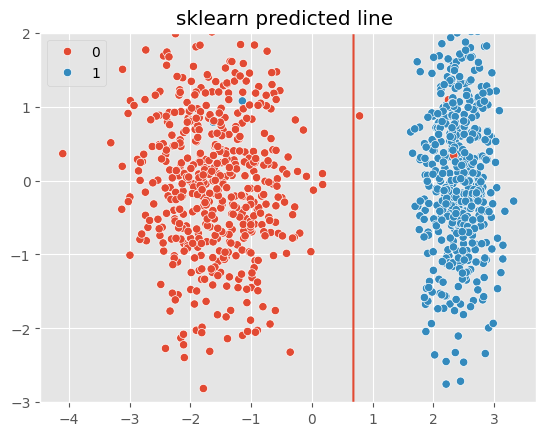

In [210]:
lr=LogisticRegression()
lr.fit(x,y)
m=lr.coef_
c=lr.intercept_
# sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)
x_input= np.linspace(-3,3,1000)
slope_m= -(m[0][0]/m[0][1])
intercept_c= -(c/m[0][1])
y_input = slope_m*x_input +intercept_c
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)
plt.plot(x_input,y_input)
plt.ylim(-3,2)
plt.title ('sklearn predicted line ')
print (m , c)

## using own perceptron trick 

<div>
<img src ='./Perceptron.jpeg' width =500 height = 200>
</div>

In [33]:
def perceptron (x, y , lr, epochs):
    x= np.insert(x, 0, 1,axis=1)
    weight = np.ones(x.shape[1])
    for i in range(epochs):
        j = np.random.randint(0, x.shape[0])
        y_hat = step(np.dot(x[j],weight))
        weight = weight + lr *(y[j]-y_hat)* x[j]
    return weight[0], weight [1:]
def step (x):
    return 1 if x>0 else 0 

Text(0.5, 1.0, 'Own predicted line using perceptron')

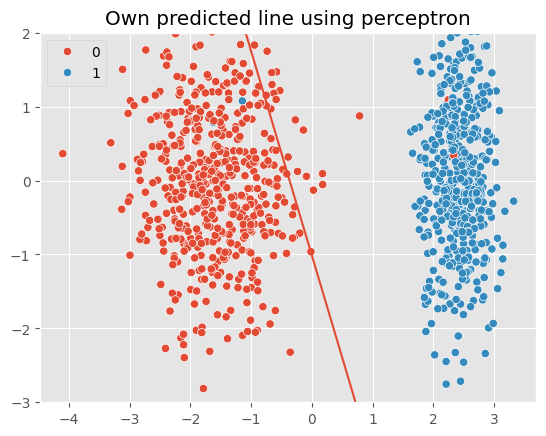

In [34]:
intercept = perceptron (x, y , 0.01, 1000)[0]
coef= perceptron (x, y , 0.01, 1000)[1]
slope_m= -(coef[0]/coef[1])
intercept_c= -(intercept/coef[1])
y_input_test = slope_m*x_input +intercept_c
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)
plt.plot(x_input,y_input_test)
plt.ylim(-3,2)
plt.title("Own predicted line using perceptron")

# Logistic Working 

<div>
<img src ='./logistic1.jpeg' width =500 height = 200>
<img src ='./logistic2.jpeg' width =500 height = 200>

</div>

In [374]:
## to make this even working we need to use the concept of sigmoid function 
## using own perceptron trick 
def perceptron_sigmoid (x, y , lr, epochs):
    x= np.insert(x, 0, 1,axis=1)
    weight = np.ones(x.shape[1])
    for i in range(epochs):
        j = np.random.randint(0, x.shape[0])
        y_hat = sigmoid(np.dot(x[j],weight))
        weight = weight + lr *(y[j]-y_hat)* x[j]
    return weight[0], weight [1:]
def sigmoid (x):
    return (1/(1+ (np.exp(-x))))

(0.8759999999999999, array([1.12711521, 0.89443955]))


Text(0.5, 1.0, 'Better line with sigmoid')

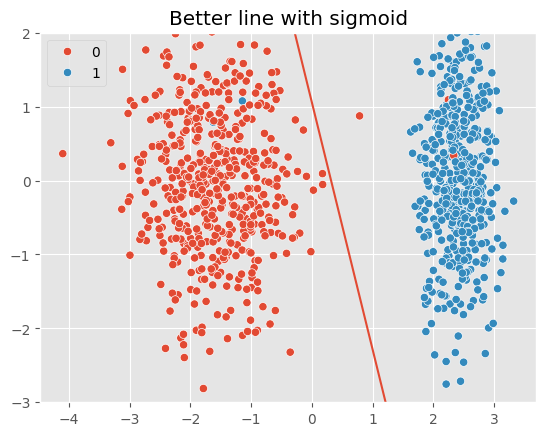

In [377]:
intercept_s = perceptron_sigmoid (x, y , 0.005, 10000)[0]
print(perceptron(x, y , 0.001, 1000))
coef_s= perceptron_sigmoid (x, y , 0.01, 1000)[1]
slope_m_s= -(coef_s[0]/coef_s[1])
intercept_c_s= -(intercept_s/coef_s[1])
y_input_test_s= slope_m_s*x_input +intercept_c_s
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)
plt.plot(x_input,y_input_test_s)
plt.ylim(-3,2)
plt.title("Better line with sigmoid")


In [85]:
## this type of concept doesn't provide optimal solution 
## to find out optimal solution for any ml model we need to find it's loss function to minimize the error to get optimal solution 
## loss function are mentioned below in figure and way of finding it 

In [354]:
## Gradient Descent 
def GDclassification (x, y , lr, epochs):
    x= np.insert(x, 0, 1,axis=1)
    weight = np.ones(x.shape[1])
    for i in range(epochs):
        y_hat =sigmoid(np.dot(x,weight))
        y_minus_y_hat= y-y_hat
        average= np.dot(y_minus_y_hat,x) 
        loss= (-1/x.shape[0]* average)
        weight = weight - lr * loss
    return weight 
def sigmoid (x):
    return (1/(1+ (np.exp(-x))))

[-2.16713917  3.07698332 -0.01998176]


Text(0.5, 1.0, 'Gradient descent Line')

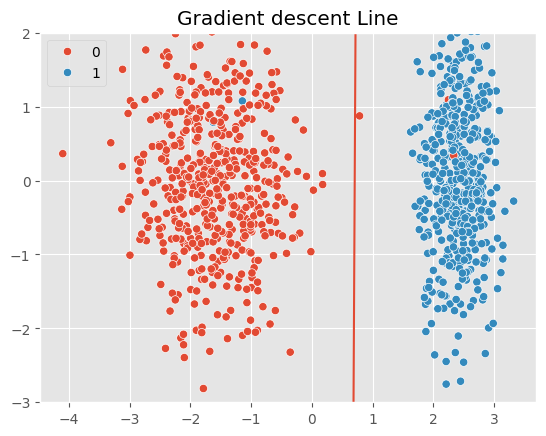

In [378]:
result =GDclassification(x, y , 0.1, 10000)

print(result)
intercept_s = result[0]
coef_s= result[1:]
slope_m_s= -(coef_s[0]/coef_s[1])
intercept_c_s= -(intercept_s/coef_s[1])
y_input_test_s= slope_m_s*x_input +intercept_c_s
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)
plt.plot(x_input,y_input_test_s)
plt.ylim(-3,2)
plt.title("Gradient descent Line")
## [-1.96882206] [[ 2.87876946e+00 -1.27619505e-03]] 
## kind of same as scikit learn model logestic regression 
## this is the optimal solution 

## Softmax regression 

<img src ='./softmax.jpeg' width =500 height = 200>
